<a href="https://colab.research.google.com/github/oyyarko/deeplearning_rnn/blob/master/stock_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.preprocessing import MinMaxScaler

TensorFlow 2.x selected.


API Key: PR4PLFOAS2YXOZ1I

In [20]:
os.chdir('/content/drive/My Drive/Colab Notebooks/')
data = pd.read_csv('NSEI.csv', date_parser=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3081,2020-03-16,9587.799805,9602.200195,9165.099609,9197.400391,9197.400391,897700.0
3082,2020-03-17,9285.400391,9403.799805,8915.599609,8967.049805,8967.049805,935600.0
3083,2020-03-18,9088.450195,9127.549805,8407.049805,8468.799805,8468.799805,1516600.0
3084,2020-03-19,8063.299805,8575.450195,7832.549805,8263.450195,8263.450195,925700.0
3085,2020-03-20,8284.450195,8883.000000,8178.200195,8745.450195,8745.450195,1071500.0


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


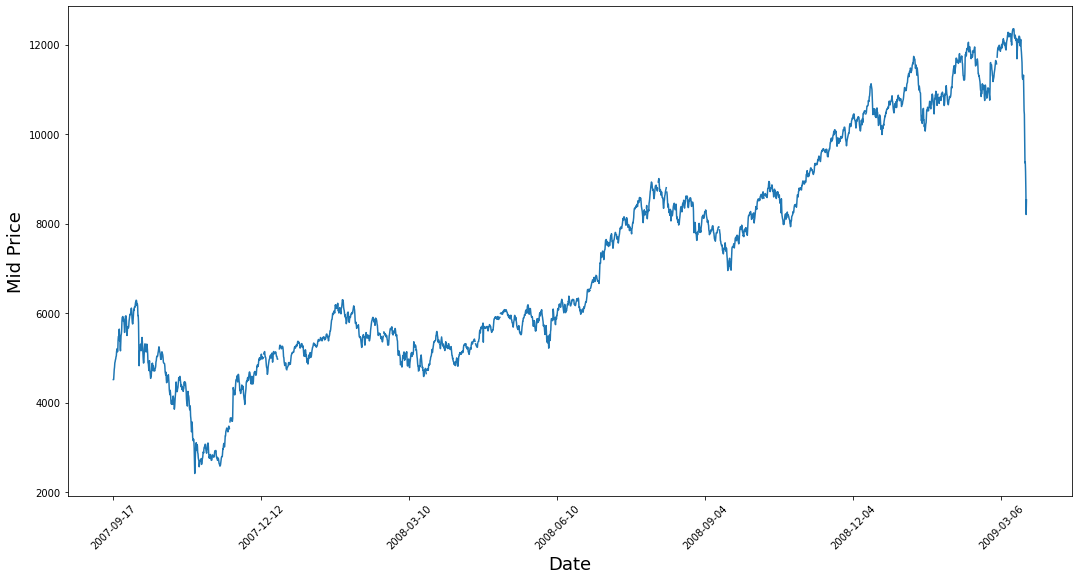

In [4]:
plt.figure(figsize=(18, 9))
plt.plot(range(df.shape[0]), (df['Low']+df['High'])/2.0)
plt.xticks(range(0, df.shape[0], 500), df['Date'].loc[::60], rotation=45)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Mid Price', fontsize=18)
plt.show()

In [0]:
data_training = data[data['Date']<'2019-12-01'].copy()
data_testing = data[data['Date']>='2019-12-01'].copy()

In [0]:
data_training = data_training.drop(['Date', 'Adj Close'], axis=1)

In [24]:
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training[0:10]

array([[0.20482977, 0.2051235 , 0.22647047, 0.2046806 , 0.        ],
       [0.20229135, 0.20541075, 0.22633843, 0.21003539, 0.        ],
       [0.20814481, 0.22496475, 0.23331505, 0.22937172, 0.        ],
       [0.22738882, 0.2272471 , 0.25067023, 0.23095059, 0.        ],
       [0.2292757 , 0.23715467, 0.25194473, 0.24029934, 0.        ],
       [0.23805327, 0.24608032, 0.26245022, 0.25013116, 0.        ],
       [0.24868127, 0.24741212, 0.26661384, 0.25082192, 0.        ],
       [0.2485249 , 0.2502272 , 0.27191486, 0.2509933 , 0.        ],
       [0.24905657, 0.25394056, 0.27316904, 0.25723098, 0.        ],
       [0.25465985, 0.25805607, 0.27862744, 0.25939161, 0.        ]])

In [0]:
X_train = []
y_train = []

In [0]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])

In [0]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train.shape

(2949, 60, 5)

In [13]:
y_train.shape

(2949,)

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [0]:
regressior = Sequential()

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

In [16]:
regressior.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            15840     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [0]:
regressior.compile(optimizer='adam', loss = 'mean_squared_error')

In [19]:
regressior.fit(X_train, y_train, epochs=10, batch_size=32)

Train on 2949 samples
Epoch 1/10
2949/2949 [==============================] - 16s 5ms/sample - loss: nan
Epoch 2/10
2949/2949 [==============================] - 16s 5ms/sample - loss: nan
Epoch 3/10
 960/2949 [========>.....................] - ETA: 10s - loss: nan

KeyboardInterrupt: ignored